In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.stats import mode, pearsonr
from scipy.optimize import curve_fit
from statsmodels.robust import mad
from numpy.random import normal

Gamma_min = 0.5
Gamma_max = 100
P_min = 0.1

dr="/Users/bjackson/Downloads/ps_bundle/data_calibrated"
dr_wind = '/Users/bjackson/Downloads/twins_bundle/data_derived'
# dr="/Users/brian/Downloads/ps_bundle/data_calibrated"
# dr_wind = '/Users/brian/Downloads/twins_bundle/data_derived'

aspect_ratio = 16./9 # On HD projectors nowadays, this is the aspect ratio.
                     # so I make my figures using that ratio so they show up nicely in presentations.
BoiseState_blue = "#0033A0"
BoiseState_orange = "#D64309"

0.9191176470588235


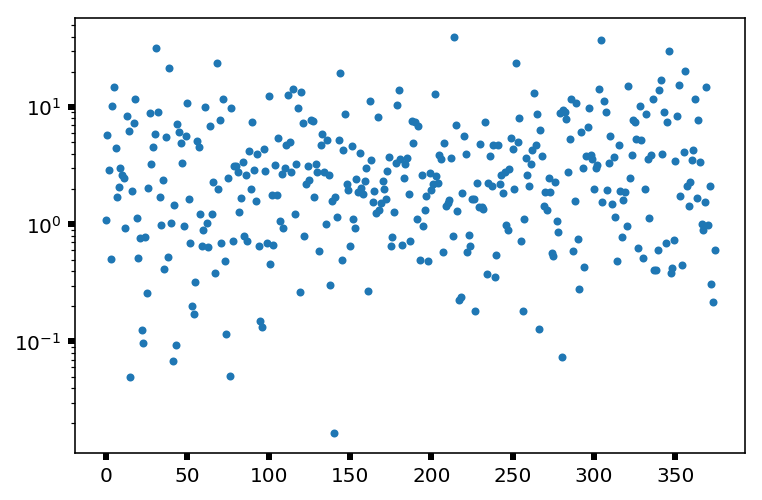

In [64]:
our_detections_filename = "all_vortices.csv"
our_detections = np.genfromtxt(our_detections_filename, delimiter=',', names=True)
# print(our_detections.dtype.names)
# ('vortex_number', 'sol', 't0', 't0_unc', 'DeltaP', 'DeltaP_unc', 'Gamma', 'Gamma_unc', 'intercept', 'intercept_unc', 'slope', 'slope_unc', 'convolution')

Spigas_detections_filename = "alldrop_ordered.txt"
Spigas_detections = np.genfromtxt(Spigas_detections_filename, delimiter=';', names=True, skip_header=1)
# print(Spigas_detections.dtype.names)
# ('_DROP_', '_LTST_', 'SOL', 'YYYYMMDDTHHMMSSsss', 'RATIO')

# plt.scatter(Spigas_detections['_LTST_'], Spigas_detections['SOL'])
# plt.scatter(our_detections['t0'], our_detections['sol'], alpha=0.25)
# plt.ylim([0, np.max(Spigas_detections['SOL'])])

mutual_detections = []
how_far_off_deltaP = np.array([])
ind = our_detections['sol'] <= np.max(Spigas_detections['SOL'])
for i in range(len(our_detections['sol'][ind])):    
    oind = (our_detections['sol'][ind][i] == Spigas_detections['SOL']) &\
        (np.abs(our_detections['t0'][ind][i] - Spigas_detections['_LTST_']) < our_detections['Gamma'][ind][i]/3600.)
    
    if(len(Spigas_detections['_LTST_'][oind]) > 0):
        mutual_detections.append([our_detections['sol'][ind][i], our_detections['t0'][ind][i], 
                                  our_detections['DeltaP'][ind][i], our_detections['DeltaP_unc'][ind][i],
                                  Spigas_detections['SOL'][oind][0], Spigas_detections['_LTST_'][oind][0], 
                                  Spigas_detections['_DROP_'][oind][0]])
        how_far_off_deltaP = np.append(how_far_off_deltaP, 
            np.abs(our_detections['DeltaP'][ind][i] + Spigas_detections['_DROP_'][oind][0])/\
                                      our_detections['DeltaP_unc'][ind][i])
# Among vortices detected before sol 220 (the only ones that Spiga posted), what fraction of my detections did
# Spiga also detect?
# 0.9191176470588235
print(len(mutual_detections)/len(our_detections['sol'][ind]))

# For whatever reason, my pressure excursion estimates are not a great match to Spiga's...
plt.semilogy(how_far_off_deltaP, marker='.', ls='')